In [23]:
import time
import os
import cv2
import numpy as np

from input_feeder import InputFeeder
from mouse_controller import MouseController
from face_detection import FaceDetection
from landmark_regression import LandmarkRegression
from head_pose import HeadPose
from gaze_estimation import GazeEstimation

import matplotlib.pyplot as plt
%matplotlib inline

DIR_PATH = os.path.split(os.getcwd())[0]
video_file = os.path.join(DIR_PATH,"bin\\demo.mp4")

face_model = os.path.join(DIR_PATH,os.path.join('model\\intel\\face-detection-adas-binary-0001\\FP32-INT1\\face-detection-adas-binary-0001'))
landmark_model= os.path.join(DIR_PATH,os.path.join('model\\intel\\landmarks-regression-retail-0009\\FP32-INT8\\landmarks-regression-retail-0009'))
headpose_model= os.path.join(DIR_PATH,os.path.join('model\\intel\\head-pose-estimation-adas-0001\\FP32-INT8\\head-pose-estimation-adas-0001'))
gaze_model = os.path.join(DIR_PATH,os.path.join('model\intel\gaze-estimation-adas-0002\FP32-INT8\gaze-estimation-adas-0002'))

In [50]:
def plot_images(image,face_image,left_eye_image,right_eye_image):
    plt.figure(figsize=(15,3))
    plt.subplot(1,4,1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.subplot(1,4,2)
    plt.imshow(cv2.cvtColor(face_image,cv2.COLOR_BGR2RGB))
    plt.subplot(1,4,3)
    plt.imshow(cv2.cvtColor(left_eye_image,cv2.COLOR_BGR2RGB))
    plt.subplot(1,4,4)
    plt.imshow(cv2.cvtColor(right_eye_image,cv2.COLOR_BGR2RGB))
    plt.axis(False)

In [74]:
face_detection= FaceDetection(face_model)
face_detection.load_model()
landmark_regression= LandmarkRegression(landmark_model)
landmark_regression.load_model()
head_pose = HeadPose(headpose_model)
head_pose.load_model()
gaze_estimation = GazeEstimation(gaze_model)
gaze_estimation.load_model()
mouse_controller = MouseController('medium','fast')
input_feeder = InputFeeder('video',video_file)
input_feeder.load_data()

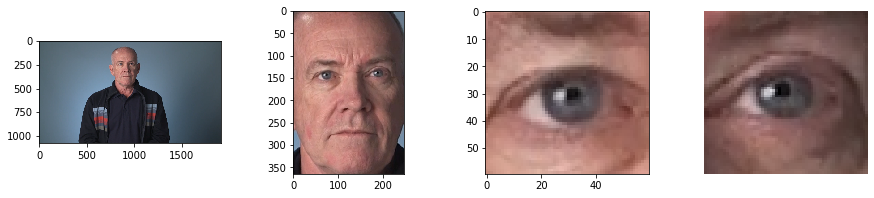

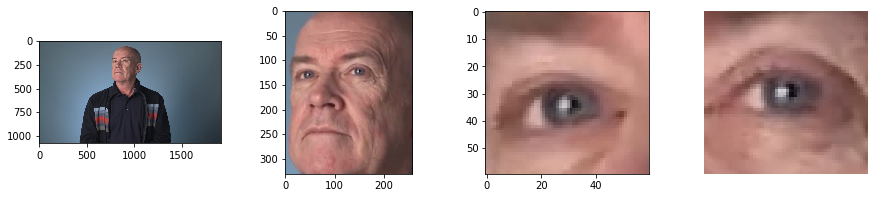

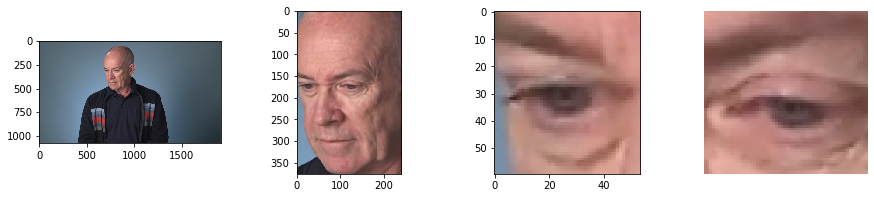

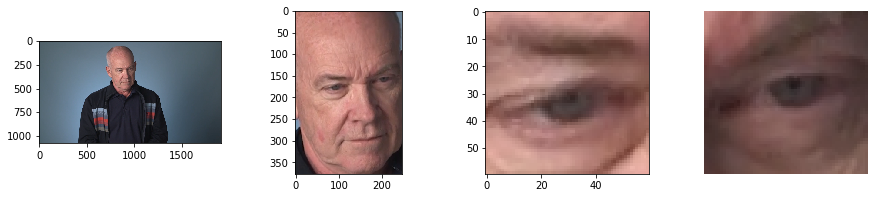

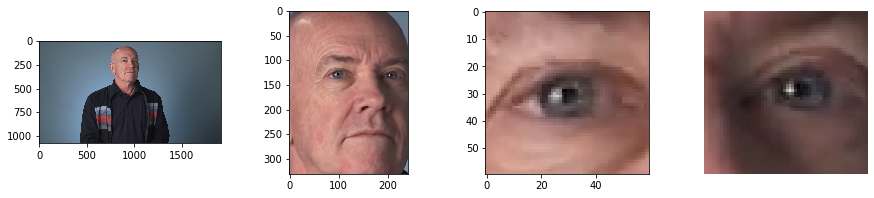

In [75]:
temp = []
for i in range(25):
    image = next(iter(input_feeder.next_batch()))
    if i%5==0:
        face_image = face_detection.predict(image)
        left_eye_image,right_eye_image = landmark_regression.predict(np.copy(face_image))
        head_pose_angles = head_pose.predict(np.copy(face_image))
        x,y,z = gaze_estimation.predict(left_eye_image,right_eye_image,head_pose_angles)
        temp.append([x,y])
        plot_images(image,face_image,left_eye_image,right_eye_image)
input_feeder.close()

In [76]:
for x in temp:
    mouse_controller.move(x[0],x[1])